In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore,boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [2]:
df=pd.read_csv('weather')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
# There are so many null values in this dataset with numeric and with some categorical columns.

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


<Axes: xlabel='Rainfall', ylabel='Density'>

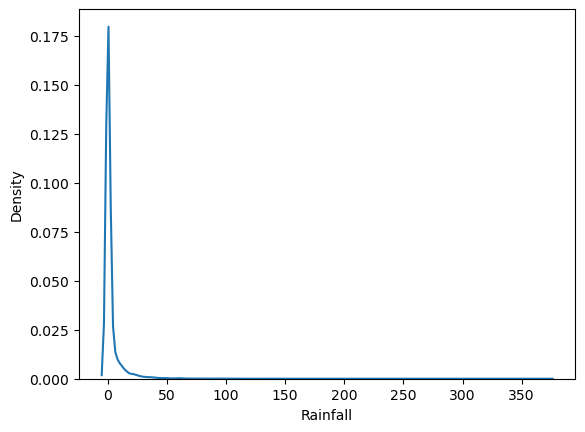

In [9]:
sns.kdeplot(df['Rainfall'])

<Axes: xlabel='Evaporation', ylabel='Density'>

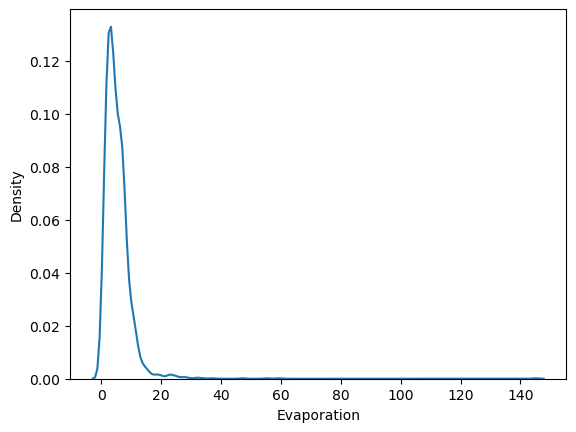

In [11]:
sns.kdeplot(df['Evaporation'])

In [12]:
# As we can see 'Rainfall' and 'Evaporation' are highly skewed so null values should be replaced by median not with mean.

In [13]:
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].median())

In [14]:
df["Date"] = pd.to_datetime(df["Date"],format = "%Y-%m-%dT")
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

In [15]:
df.drop(['Date'],axis=1,inplace=True)

In [17]:
a=df['Sunshine'].mean()
df['Sunshine']=df['Sunshine'].fillna(a)
b=df['MinTemp'].mean()
df['MinTemp']=df['MinTemp'].fillna(b)
c=df['MaxTemp'].mean()
df['MaxTemp']=df['MaxTemp'].fillna(c)
d=df['WindGustSpeed'].mean()
df['WindGustSpeed']=df['WindGustSpeed'].fillna(d)
e=df['WindGustDir'].mode()[0]
df['WindGustDir']=df['WindGustDir'].fillna(d)
f=df['WindDir9am'].mode()[0]
df['WindDir9am']=df['WindDir9am'].fillna(f)
g=df['WindDir3pm'].mode()[0]
df['WindDir3pm']=df['WindDir3pm'].fillna(g)
h=df['WindSpeed9am'].mean()
df['WindSpeed9am']=df['WindSpeed9am'].fillna(h)
i=df['WindSpeed3pm'].mean()
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(i)
j=df['Humidity9am'].mean()
df['Humidity9am']=df['Humidity9am'].fillna(j)
k=df['Humidity3pm'].mean()
df['Humidity3pm']=df['Humidity3pm'].fillna(k)
l=df['Pressure9am'].mean()
df['Pressure9am']=df['Pressure9am'].fillna(l)
m=df['Pressure3pm'].mean()
df['Pressure3pm']=df['Pressure3pm'].fillna(m)
n=df['Cloud9am'].mean()
df['Cloud9am']=df['Cloud9am'].fillna(n)
o=df['Cloud3pm'].mean()
df['Cloud3pm']=df['Cloud3pm'].fillna(o)
p=df['Temp9am'].mean()
df['Temp9am']=df['Temp9am'].fillna(p)
q=df['Temp3pm'].mean()
df['Temp3pm']=df['Temp3pm'].fillna(q)
r=df['RainToday'].mode()[0]
df['RainToday']=df['RainToday'].fillna(r)
s=df['RainTomorrow'].mode()[0]
df['RainTomorrow']=df['RainTomorrow'].fillna(s)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [19]:
df.nunique()

Location          12
MinTemp          286
MaxTemp          332
Rainfall         250
Evaporation      116
Sunshine         141
WindGustDir       17
WindGustSpeed     53
WindDir9am        16
WindDir3pm        16
WindSpeed9am      35
WindSpeed3pm      36
Humidity9am       91
Humidity3pm       95
Pressure9am      385
Pressure3pm      375
Cloud9am          10
Cloud3pm          10
Temp9am          305
Temp3pm          329
RainToday          2
RainTomorrow       2
month             12
day               31
dtype: int64

In [21]:
df['WindGustDir'].value_counts()

40.174468657519505    991
N                     713
SSE                   578
S                     577
SW                    572
E                     557
WNW                   531
W                     507
WSW                   504
SE                    484
ENE                   415
SSW                   396
NW                    383
NE                    353
NNE                   343
ESE                   302
NNW                   219
Name: WindGustDir, dtype: int64

In [22]:
df['WindGustDir']=df['WindGustDir'].replace(40.174468657519505,np.NaN)
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

In [23]:
df['WindGustDir'].value_counts()

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64

In [24]:
# Labeling
labeling=['Location','WindGustDir','WindDir9am','WindDir3pm']

lb=LabelEncoder()
for i in labeling:
    df[i]=lb.fit_transform(df[i])

In [25]:
df['RainToday']=df['RainToday'].replace({'Yes':1,'No':0})
df['RainTomorrow']=df['RainTomorrow'].replace({'Yes':1,'No':0})

In [26]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,day
0,1,13.4,22.9,0.6,4.6,7.632205,13,44.0,13,14,...,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,12,1
1,1,7.4,25.1,0.0,4.6,7.632205,14,44.0,6,15,...,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,12,2
2,1,12.9,25.7,0.0,4.6,7.632205,15,46.0,13,15,...,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,12,3
3,1,9.2,28.0,0.0,4.6,7.632205,4,24.0,9,0,...,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,12,4
4,1,17.5,32.3,1.0,4.6,7.632205,13,41.0,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,12,5


<Axes: >

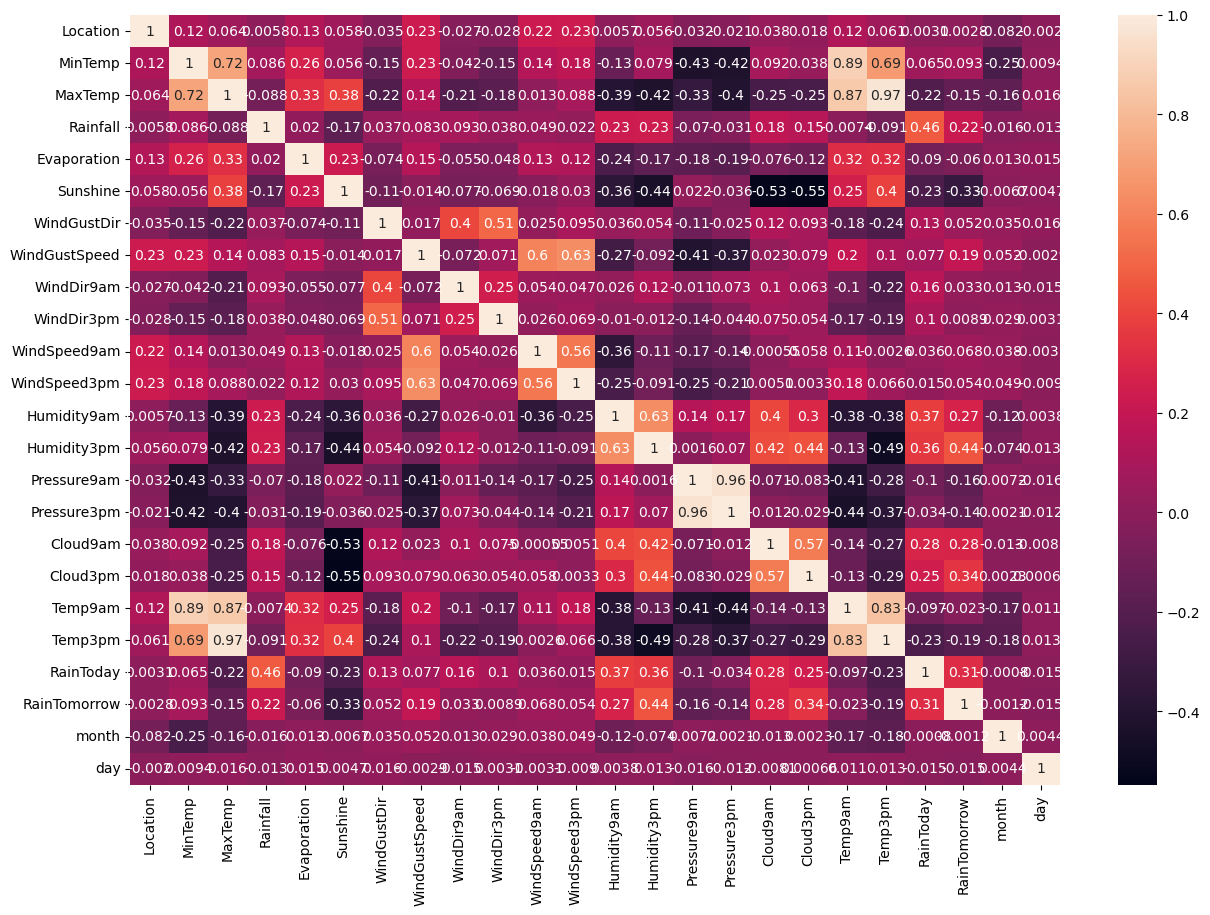

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [31]:
# there is not much correlation of any columns with target variable but some columns have multicolinearity with each
# other.

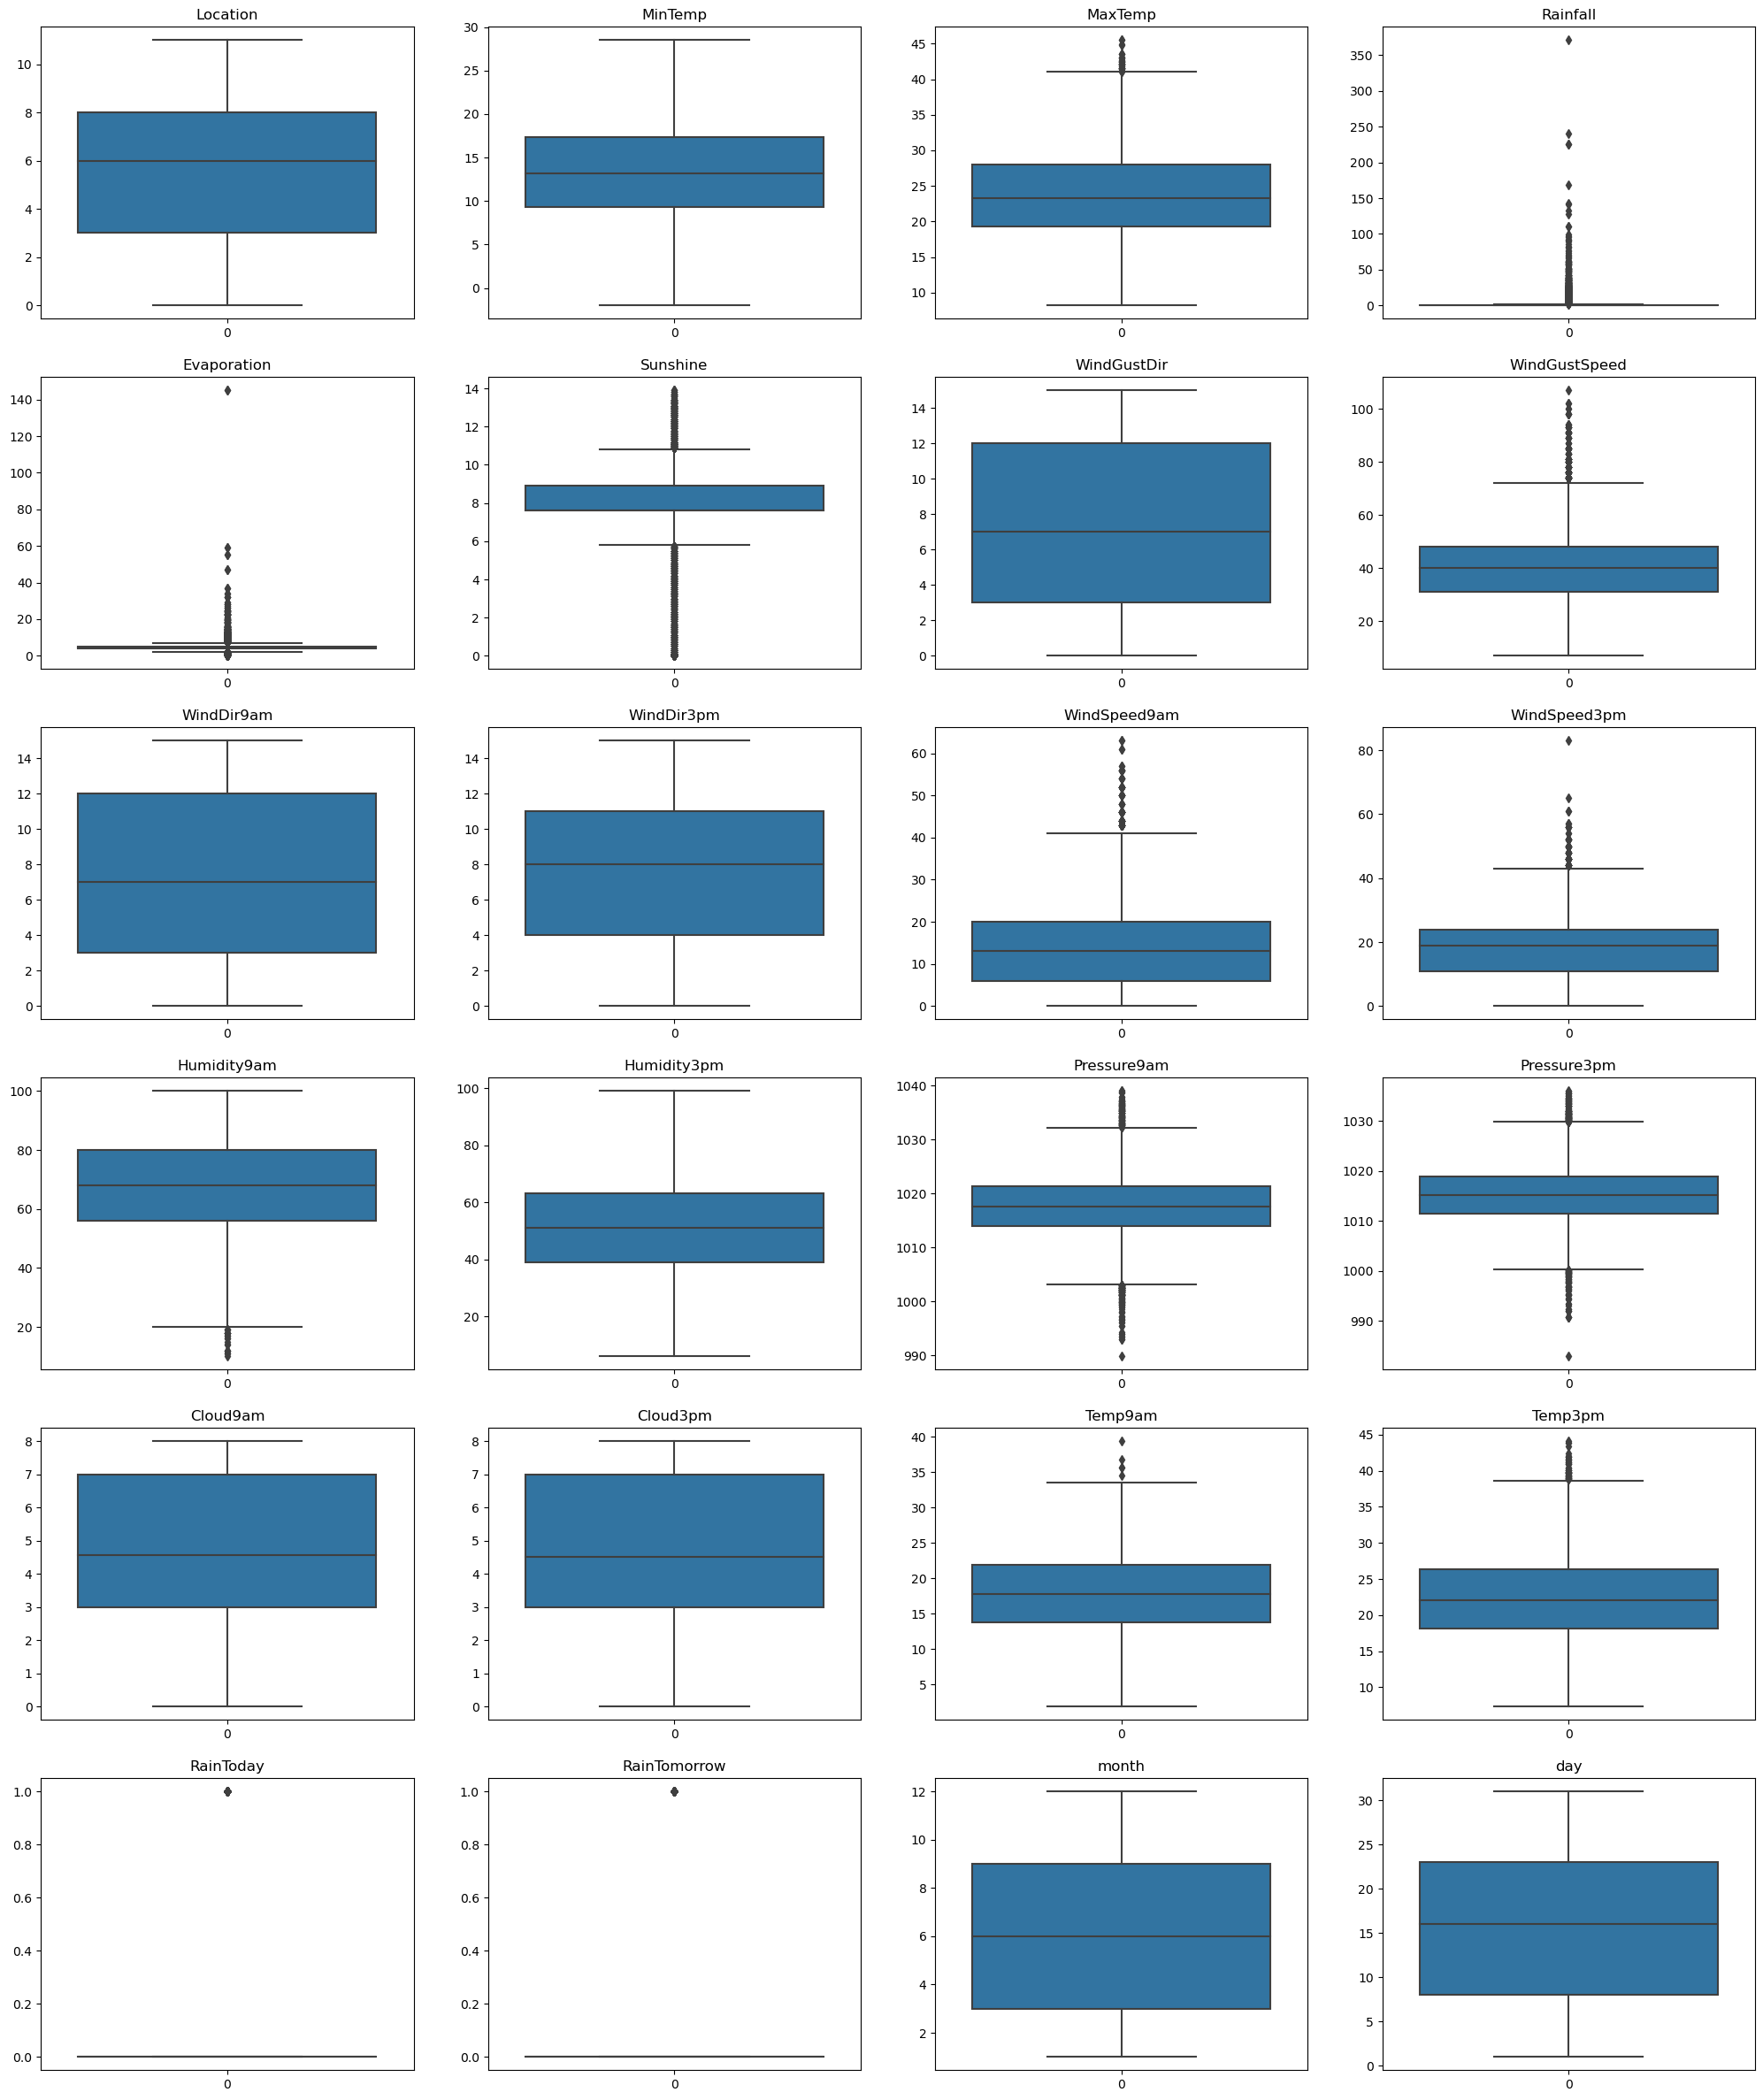

In [32]:
plt.figure(figsize=(25,30))
plot=1
for col in df.columns:
    if plot<=24:
        plt.subplot(6,4,plot)
        sns.boxplot(df[col])
        plt.title(col)
    plot +=1
plt.show()    

In [33]:
# There are some outliers in some columns like rainfall,evaporation, maxtemp...

In [34]:
df.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.200523
Evaporation      14.064000
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
month             0.039388
day               0.004260
dtype: float64

In [35]:
# 'Rainfall','Evaporation' are highly skewed.

In [38]:
df['Rainfall']=boxcox(df['Rainfall'],.5)
df['Evaporation']=boxcox(df['Evaporation'],.5)

In [39]:
outliers_columns=['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                  'Humidity9am', 'Pressure9am','Pressure3pm','Temp9am','Temp3pm']

z=np.abs(zscore(df[outliers_columns]))

In [40]:
threshold=3
df=df[(z<3).all(axis=1)]

In [41]:
# Splitting
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [42]:
# Scaling
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)

In [43]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month,day
0,-1.507591,0.059727,-0.148764,0.138158,0.028687,-0.018553,1.228374,0.367502,1.254391,1.399143,...,-1.621089,-1.693935,-1.401285,1.432257,0.018864,-0.137860,-0.101889,-0.533589,1.63447,-1.672437
1,-1.507591,-1.054607,0.217513,-0.545526,0.028687,-0.018553,1.440853,0.367502,-0.274952,1.625326,...,-1.454051,-1.208045,-1.282989,0.017584,0.018864,-0.084082,0.326318,-0.533589,1.63447,-1.558768
2,-1.507591,-0.033135,0.317406,-0.545526,0.028687,-0.018553,1.653332,0.524180,1.254391,1.625326,...,-1.175654,-1.710690,-1.130896,0.017584,-1.071799,0.597104,0.137907,-0.533589,1.63447,-1.445099
3,-1.507591,-0.720307,0.700332,-0.545526,0.028687,-0.018553,-0.683936,-1.199274,0.380480,-1.767422,...,-1.955164,-0.035208,-0.438023,0.017584,0.018864,0.077252,0.703140,-0.533589,1.63447,-1.331430
4,-1.507591,0.821188,1.416236,0.337106,0.028687,-0.018553,1.228374,0.132486,-1.367340,-0.184140,...,-1.008616,-1.174535,-1.587177,1.020221,1.542464,0.023474,1.251245,-0.533589,1.63447,-1.217761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,1.030177,-1.908930,-0.065519,-0.545526,0.028687,-0.018553,-1.533851,-0.650902,0.380480,-1.541239,...,-1.509730,1.137630,0.829426,0.017584,0.018864,-1.356824,0.000881,-0.533589,-0.12414,0.600943
7915,1.030177,-1.760352,0.250810,-0.545526,0.028687,-0.018553,-0.258978,-1.355952,0.380480,-1.088873,...,-1.676768,0.953327,0.626634,0.017584,0.018864,-1.213417,0.360575,-0.533589,-0.12414,0.714612
7916,1.030177,-1.426052,0.517193,-0.545526,0.028687,-0.018553,-0.896414,-0.180870,0.380480,1.399143,...,-1.509730,0.534456,0.237950,0.017584,0.018864,-0.926602,0.634627,-0.533589,-0.12414,0.828281
7917,1.030177,-0.980318,0.533842,-0.545526,0.028687,-0.018553,0.378459,-0.885919,0.598958,-1.088873,...,-1.509730,0.266379,0.187252,-0.627920,-1.071799,-0.460527,0.617499,-0.533589,-0.12414,0.941949


In [44]:
y.value_counts()

0    6136
1    1783
Name: RainTomorrow, dtype: int64

In [45]:
# Target data is imbalanced. We need to balance it.

smt=SMOTE()
X,Y=smt.fit_resample(x,y)

In [48]:
Y.value_counts()

0    6136
1    6136
Name: RainTomorrow, dtype: int64

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.3,random_state=42)

In [50]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(8590, 23)
(3682, 23)
(8590,)
(3682,)


In [51]:
# Building a model
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
pred=lg.predict(xtest)
print(accuracy_score(ytest, pred))
print('\n')
print(confusion_matrix(ytest, pred))
print('\n')
print(classification_report(ytest, pred))

0.7713199348180336


[[1462  422]
 [ 420 1378]]


              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1884
           1       0.77      0.77      0.77      1798

    accuracy                           0.77      3682
   macro avg       0.77      0.77      0.77      3682
weighted avg       0.77      0.77      0.77      3682



In [52]:
# preparing other models
model=[ SVC(),GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(),RandomForestClassifier()]
        
for m in model:
    m.fit(xtrain,ytrain)
    pred=m.predict(xtest)
    print(m)
    print(accuracy_score(ytest, pred))
    print('\n')
    print(confusion_matrix(ytest, pred))
    print('\n')
    print(classification_report(ytest, pred))


SVC()
0.8533405757740359


[[1544  340]
 [ 200 1598]]


              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1884
           1       0.82      0.89      0.86      1798

    accuracy                           0.85      3682
   macro avg       0.85      0.85      0.85      3682
weighted avg       0.86      0.85      0.85      3682

GaussianNB()
0.7332971211298207


[[1409  475]
 [ 507 1291]]


              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1884
           1       0.73      0.72      0.72      1798

    accuracy                           0.73      3682
   macro avg       0.73      0.73      0.73      3682
weighted avg       0.73      0.73      0.73      3682

DecisionTreeClassifier()
0.864204236827811


[[1607  277]
 [ 223 1575]]


              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1884
           1       0.85      0.88      0.86 

In [53]:
# as we can see our best model is Random Forest Classifier with 93% accuracy.

In [56]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
Pred=rf.predict(xtest)
print(accuracy_score(ytest, Pred))
print('\n')
print(confusion_matrix(ytest, Pred))
print('\n')
print(classification_report(ytest, Pred))



0.9342748506246605


[[1748  136]
 [ 106 1692]]


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1884
           1       0.93      0.94      0.93      1798

    accuracy                           0.93      3682
   macro avg       0.93      0.93      0.93      3682
weighted avg       0.93      0.93      0.93      3682



In [58]:
# saving the model
import joblib
joblib.dump(rf,'Rain_forecasting.obj')


['Rain_forecasting.obj']